In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('./datasets/final_data.csv')

In [6]:
df.shape

(141530, 19)

In [7]:
df.isna().sum()

Protocol                  0
Flow Duration             0
Total Fwd Packet          0
Total Bwd packets         0
Flow Bytes/s              0
Flow Packets/s            0
Fwd Packet Length Mean    0
Bwd Packet Length Mean    0
Packet Length Mean        0
Packet Length Std         0
Fwd IAT Mean              0
Bwd IAT Mean              0
Idle Mean                 0
SYN Flag Count            0
ACK Flag Count            0
RST Flag Count            0
FIN Flag Count            0
Label                     0
Label.1                   0
dtype: int64

In [8]:
df['Label'].value_counts()

Label
Non-Tor    93356
NonVPN     23863
VPN        22919
Tor         1392
Name: count, dtype: int64

In [9]:
df['Label'] = df['Label'].replace({'Non-Tor': 'Normal', 'NonVPN': 'Normal', 'VPN': 'Malicious', 'Tor': 'Malicious'})

In [10]:
df['Label'].value_counts()

Label
Normal       117219
Malicious     24311
Name: count, dtype: int64

In [11]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(df.drop(columns=['Label']), df['Label'])
df = pd.concat([X_resampled, y_resampled], axis=1)

print(df['Label'].value_counts())


Label
Malicious    24311
Normal       24311
Name: count, dtype: int64


C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [12]:
df.to_csv('final0.1.csv',index=False)

In [13]:
df = pd.read_csv('final0.1.csv')

In [14]:
import numpy as np

# Missing values check
print(df.isnull().sum())


Protocol                  0
Flow Duration             0
Total Fwd Packet          0
Total Bwd packets         0
Flow Bytes/s              0
Flow Packets/s            0
Fwd Packet Length Mean    0
Bwd Packet Length Mean    0
Packet Length Mean        0
Packet Length Std         0
Fwd IAT Mean              0
Bwd IAT Mean              0
Idle Mean                 0
SYN Flag Count            0
ACK Flag Count            0
RST Flag Count            0
FIN Flag Count            0
Label.1                   0
Label                     0
dtype: int64


In [15]:
# Label Encoding (Normal -> 0, Malicious -> 1)
df['Label'] = df['Label'].map({'Normal': 0, 'Malicious': 1})

# Verify encoding
print(df['Label'].value_counts())

Label
1    24311
0    24311
Name: count, dtype: int64


In [16]:
df = df.drop(columns=['Label.1','Idle Mean'])

In [17]:
# Features (Independent variables)
X = df.drop(columns=['Label'])  # Ensure 'Label' is your target column

# Target variable (Dependent variable)
y = df['Label']


In [18]:
print(X.dtypes)  # Check feature types
print(y.dtypes)  # Check target variable type

Protocol                  float64
Flow Duration             float64
Total Fwd Packet            int64
Total Bwd packets         float64
Flow Bytes/s              float64
Flow Packets/s            float64
Fwd Packet Length Mean    float64
Bwd Packet Length Mean    float64
Packet Length Mean        float64
Packet Length Std         float64
Fwd IAT Mean              float64
Bwd IAT Mean              float64
SYN Flag Count            float64
ACK Flag Count            float64
RST Flag Count            float64
FIN Flag Count            float64
dtype: object
int64


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)  # Convert 'Malicious', 'Benign', etc., to numeric values

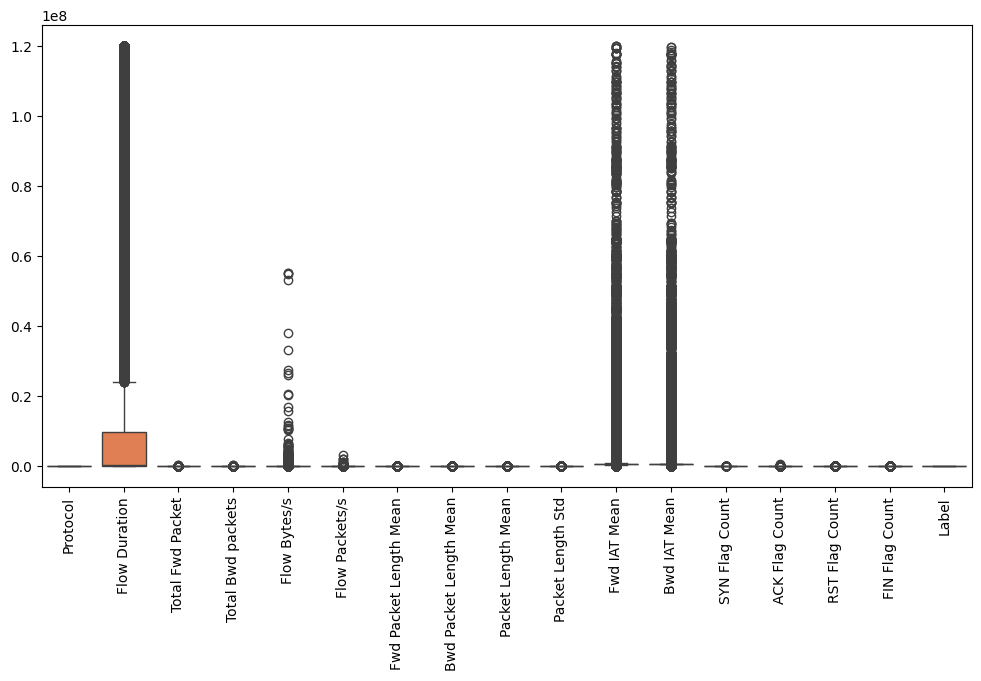

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

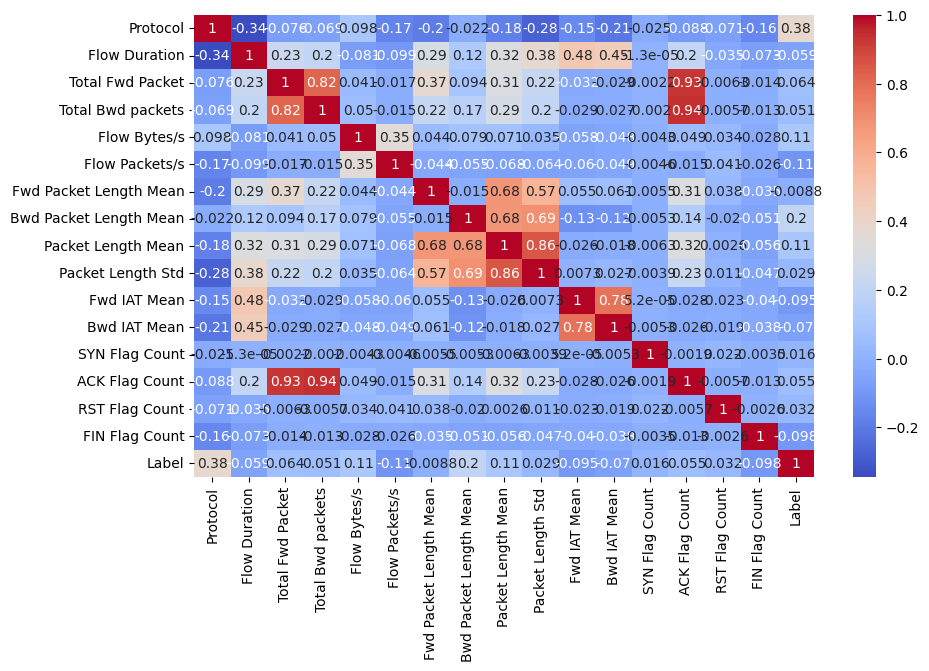

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Label
1    24311
0    24311
Name: count, dtype: int64


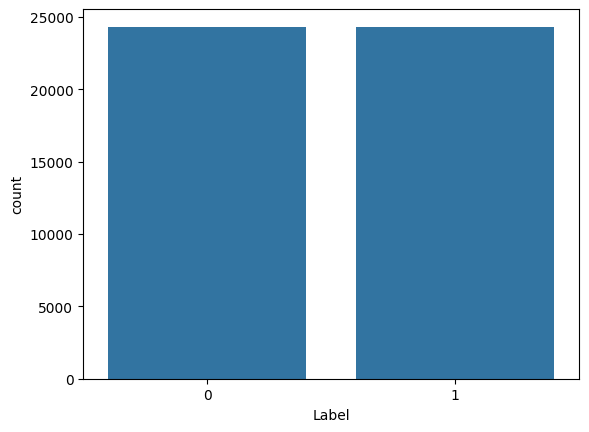

In [22]:
print(df['Label'].value_counts())
sns.countplot(x=df['Label'])
plt.show()

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation of Idle Mean with target variable
correlation = df.assign(Target=y).corr()['Label'].sort_values(ascending=False)
print(correlation)


Target                    1.000000
Label                     1.000000
Protocol                  0.377910
Bwd Packet Length Mean    0.199522
Flow Bytes/s              0.111019
Packet Length Mean        0.107101
Total Fwd Packet          0.064047
ACK Flag Count            0.054932
Total Bwd packets         0.050882
RST Flag Count            0.032022
Packet Length Std         0.029095
SYN Flag Count            0.016331
Fwd Packet Length Mean   -0.008825
Flow Duration            -0.058986
Bwd IAT Mean             -0.069572
Fwd IAT Mean             -0.094855
FIN Flag Count           -0.097657
Flow Packets/s           -0.112241
Name: Label, dtype: float64


In [24]:
from sklearn.preprocessing import StandardScaler
# Step 1: Label Encoding (Normal -> 0, Malicious -> 1)
df['Label'] = df['Label'].map({'Normal': 0, 'Malicious': 1})

# Step 2: Outlier Removal using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Outlier range define karein
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers ko cap karein (winsorization technique)
df = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Step 3: Feature Scaling
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Save processed dataset
df.to_csv('processed_dataset.csv', index=False)
print("Outliers handled & dataset normalized successfully! ✅")


C:\Users\Arsalan Khatri\AppData\Local\Temp\ipykernel_13096\1875403046.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.79036088  1.79036088  1.79036088 ... -0.3114047  -0.3114047
  1.79036088]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])


Outliers handled & dataset normalized successfully! ✅


In [53]:
# Replace infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Handle categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [34]:
df2 = df.drop(columns=['Label.1', 'Idle Mean'])

In [35]:
df2['Label'] = df['Label'].replace({'Non-Tor': 'Normal', 'NonVPN': 'Normal', 'VPN': 'Malicious', 'Tor': 'Malicious'})

In [36]:
df2

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Bytes/s,Flow Packets/s,Fwd Packet Length Mean,Bwd Packet Length Mean,Packet Length Mean,Packet Length Std,Fwd IAT Mean,Bwd IAT Mean,SYN Flag Count,ACK Flag Count,RST Flag Count,FIN Flag Count,Label
0,6.0,119384497.0,767,2027.0,21271.706661,23.403374,118.228162,1208.106068,908.785331,606.092512,1.558542e+05,5.892614e+04,2.0,2794.0,1.0,1.0,Malicious
1,6.0,119754701.0,1021,2537.0,25832.472330,29.710733,167.766895,1151.860465,869.374262,612.115805,1.174066e+05,4.722171e+04,2.0,3558.0,1.0,1.0,Malicious
2,6.0,118908117.0,683,1662.0,17486.409275,19.721110,113.688141,1204.348375,886.538363,616.479582,1.743521e+05,7.158810e+04,2.0,2345.0,1.0,1.0,Malicious
3,6.0,739728.0,2,2.0,1468.107196,5.407393,271.500000,271.500000,325.800000,297.413349,7.397280e+05,7.395260e+05,2.0,4.0,1.0,1.0,Malicious
4,6.0,149270.0,2,2.0,7570.174851,26.797079,282.500000,282.500000,339.000000,309.463245,1.492700e+05,1.490460e+05,2.0,4.0,1.0,1.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48617,6.0,107876834.0,15,14.0,46.154488,0.268825,183.066667,159.500000,165.966667,411.130610,7.705488e+06,8.298171e+06,2.0,28.0,1.0,1.0,Normal
48618,17.0,2245662.0,1,1.0,37.405451,0.890606,34.000000,50.000000,39.333333,9.237604,4.154860e+05,6.130710e+05,2.0,4.0,1.0,1.0,Normal
48619,17.0,420613.0,2,2.0,104.609225,4.754965,22.000000,130.777778,22.000000,101.613647,4.206130e+05,6.130710e+05,2.0,4.0,1.0,1.0,Normal
48620,6.0,5712811.0,2,2.0,225.967541,0.350090,37.000000,130.777778,55.800000,101.613647,5.712811e+06,6.130710e+05,2.0,2.0,1.0,1.0,Normal


In [37]:
df2['Label'].value_counts()

Label
Malicious    24311
Normal       24311
Name: count, dtype: int64

In [38]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(df.drop(columns=['Label']), df['Label'])
df2 = pd.concat([X_resampled, y_resampled], axis=1)

print(df2['Label'].value_counts())


Label
Malicious    24311
Normal       24311
Name: count, dtype: int64


C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Arsalan Khatri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [40]:
df2.to_csv('./datasets/incoded_data.csv',index=True)

In [41]:
en_data = pd.read_csv('./datasets/incoded_data.csv')

In [42]:
en_data

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Bytes/s,Flow Packets/s,Fwd Packet Length Mean,Bwd Packet Length Mean,Packet Length Mean,Packet Length Std,Fwd IAT Mean,Bwd IAT Mean,Idle Mean,SYN Flag Count,ACK Flag Count,RST Flag Count,FIN Flag Count,Label.1,Label
0,0,6.0,119384497.0,767,2027.0,21271.706661,23.403374,118.228162,1208.106068,908.785331,606.092512,1.558542e+05,5.892614e+04,1.456328e+15,2.0,2794.0,1.0,1.0,audio-streaming,Malicious
1,1,6.0,119754701.0,1021,2537.0,25832.472330,29.710733,167.766895,1151.860465,869.374262,612.115805,1.174066e+05,4.722171e+04,1.456328e+15,2.0,3558.0,1.0,1.0,audio-streaming,Malicious
2,2,6.0,118908117.0,683,1662.0,17486.409275,19.721110,113.688141,1204.348375,886.538363,616.479582,1.743521e+05,7.158810e+04,1.456328e+15,2.0,2345.0,1.0,1.0,audio-streaming,Malicious
3,3,6.0,739728.0,2,2.0,1468.107196,5.407393,271.500000,271.500000,325.800000,297.413349,7.397280e+05,7.395260e+05,1.456328e+15,2.0,4.0,1.0,1.0,audio-streaming,Malicious
4,4,6.0,149270.0,2,2.0,7570.174851,26.797079,282.500000,282.500000,339.000000,309.463245,1.492700e+05,1.490460e+05,1.456328e+15,2.0,4.0,1.0,1.0,audio-streaming,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48617,45886,6.0,239.0,1,1.0,225.967541,8368.200837,37.000000,130.777778,55.800000,101.613647,4.154860e+05,6.130710e+05,1.456254e+15,2.0,2.0,1.0,1.0,browsing,Normal
48618,29701,6.0,119771943.0,67,69.0,55.705868,1.135491,48.477612,49.623188,48.715328,179.091824,1.814724e+06,1.761346e+06,1.456415e+15,2.0,136.0,1.0,1.0,file-transfer,Normal
48619,25171,6.0,25509.0,1,1.0,225.967541,78.403701,37.000000,130.777778,55.800000,101.613647,4.154860e+05,6.130710e+05,1.456254e+15,2.0,2.0,1.0,1.0,file-transfer,Normal
48620,40106,6.0,78225120.0,8,6.0,7.146042,0.178971,46.375000,31.333333,37.533333,65.516483,1.117498e+07,1.462816e+07,1.456324e+15,2.0,14.0,1.0,1.0,p2p,Normal


In [43]:
en_data = en_data.drop(columns=['Label.1','Idle Mean'])

In [44]:
en_data['Label'].value_counts()

Label
Malicious    24311
Normal       24311
Name: count, dtype: int64

In [45]:
en_data

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Bytes/s,Flow Packets/s,Fwd Packet Length Mean,Bwd Packet Length Mean,Packet Length Mean,Packet Length Std,Fwd IAT Mean,Bwd IAT Mean,SYN Flag Count,ACK Flag Count,RST Flag Count,FIN Flag Count,Label
0,0,6.0,119384497.0,767,2027.0,21271.706661,23.403374,118.228162,1208.106068,908.785331,606.092512,1.558542e+05,5.892614e+04,2.0,2794.0,1.0,1.0,Malicious
1,1,6.0,119754701.0,1021,2537.0,25832.472330,29.710733,167.766895,1151.860465,869.374262,612.115805,1.174066e+05,4.722171e+04,2.0,3558.0,1.0,1.0,Malicious
2,2,6.0,118908117.0,683,1662.0,17486.409275,19.721110,113.688141,1204.348375,886.538363,616.479582,1.743521e+05,7.158810e+04,2.0,2345.0,1.0,1.0,Malicious
3,3,6.0,739728.0,2,2.0,1468.107196,5.407393,271.500000,271.500000,325.800000,297.413349,7.397280e+05,7.395260e+05,2.0,4.0,1.0,1.0,Malicious
4,4,6.0,149270.0,2,2.0,7570.174851,26.797079,282.500000,282.500000,339.000000,309.463245,1.492700e+05,1.490460e+05,2.0,4.0,1.0,1.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48617,45886,6.0,239.0,1,1.0,225.967541,8368.200837,37.000000,130.777778,55.800000,101.613647,4.154860e+05,6.130710e+05,2.0,2.0,1.0,1.0,Normal
48618,29701,6.0,119771943.0,67,69.0,55.705868,1.135491,48.477612,49.623188,48.715328,179.091824,1.814724e+06,1.761346e+06,2.0,136.0,1.0,1.0,Normal
48619,25171,6.0,25509.0,1,1.0,225.967541,78.403701,37.000000,130.777778,55.800000,101.613647,4.154860e+05,6.130710e+05,2.0,2.0,1.0,1.0,Normal
48620,40106,6.0,78225120.0,8,6.0,7.146042,0.178971,46.375000,31.333333,37.533333,65.516483,1.117498e+07,1.462816e+07,2.0,14.0,1.0,1.0,Normal


In [46]:
en_data['Label'].replace({'Non-Tor': 'Normal', 'NonVPN': 'Normal', 'VPN': 'Malicious', 'Tor': 'Malicious'})

0        Malicious
1        Malicious
2        Malicious
3        Malicious
4        Malicious
           ...    
48617       Normal
48618       Normal
48619       Normal
48620       Normal
48621       Normal
Name: Label, Length: 48622, dtype: object

In [47]:
en_data

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Bytes/s,Flow Packets/s,Fwd Packet Length Mean,Bwd Packet Length Mean,Packet Length Mean,Packet Length Std,Fwd IAT Mean,Bwd IAT Mean,SYN Flag Count,ACK Flag Count,RST Flag Count,FIN Flag Count,Label
0,0,6.0,119384497.0,767,2027.0,21271.706661,23.403374,118.228162,1208.106068,908.785331,606.092512,1.558542e+05,5.892614e+04,2.0,2794.0,1.0,1.0,Malicious
1,1,6.0,119754701.0,1021,2537.0,25832.472330,29.710733,167.766895,1151.860465,869.374262,612.115805,1.174066e+05,4.722171e+04,2.0,3558.0,1.0,1.0,Malicious
2,2,6.0,118908117.0,683,1662.0,17486.409275,19.721110,113.688141,1204.348375,886.538363,616.479582,1.743521e+05,7.158810e+04,2.0,2345.0,1.0,1.0,Malicious
3,3,6.0,739728.0,2,2.0,1468.107196,5.407393,271.500000,271.500000,325.800000,297.413349,7.397280e+05,7.395260e+05,2.0,4.0,1.0,1.0,Malicious
4,4,6.0,149270.0,2,2.0,7570.174851,26.797079,282.500000,282.500000,339.000000,309.463245,1.492700e+05,1.490460e+05,2.0,4.0,1.0,1.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48617,45886,6.0,239.0,1,1.0,225.967541,8368.200837,37.000000,130.777778,55.800000,101.613647,4.154860e+05,6.130710e+05,2.0,2.0,1.0,1.0,Normal
48618,29701,6.0,119771943.0,67,69.0,55.705868,1.135491,48.477612,49.623188,48.715328,179.091824,1.814724e+06,1.761346e+06,2.0,136.0,1.0,1.0,Normal
48619,25171,6.0,25509.0,1,1.0,225.967541,78.403701,37.000000,130.777778,55.800000,101.613647,4.154860e+05,6.130710e+05,2.0,2.0,1.0,1.0,Normal
48620,40106,6.0,78225120.0,8,6.0,7.146042,0.178971,46.375000,31.333333,37.533333,65.516483,1.117498e+07,1.462816e+07,2.0,14.0,1.0,1.0,Normal


In [48]:
en_data['Label'].map({'normal': 0, 'malicious': 1})

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
48617   NaN
48618   NaN
48619   NaN
48620   NaN
48621   NaN
Name: Label, Length: 48622, dtype: float64

In [49]:
en_data

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Flow Bytes/s,Flow Packets/s,Fwd Packet Length Mean,Bwd Packet Length Mean,Packet Length Mean,Packet Length Std,Fwd IAT Mean,Bwd IAT Mean,SYN Flag Count,ACK Flag Count,RST Flag Count,FIN Flag Count,Label
0,0,6.0,119384497.0,767,2027.0,21271.706661,23.403374,118.228162,1208.106068,908.785331,606.092512,1.558542e+05,5.892614e+04,2.0,2794.0,1.0,1.0,Malicious
1,1,6.0,119754701.0,1021,2537.0,25832.472330,29.710733,167.766895,1151.860465,869.374262,612.115805,1.174066e+05,4.722171e+04,2.0,3558.0,1.0,1.0,Malicious
2,2,6.0,118908117.0,683,1662.0,17486.409275,19.721110,113.688141,1204.348375,886.538363,616.479582,1.743521e+05,7.158810e+04,2.0,2345.0,1.0,1.0,Malicious
3,3,6.0,739728.0,2,2.0,1468.107196,5.407393,271.500000,271.500000,325.800000,297.413349,7.397280e+05,7.395260e+05,2.0,4.0,1.0,1.0,Malicious
4,4,6.0,149270.0,2,2.0,7570.174851,26.797079,282.500000,282.500000,339.000000,309.463245,1.492700e+05,1.490460e+05,2.0,4.0,1.0,1.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48617,45886,6.0,239.0,1,1.0,225.967541,8368.200837,37.000000,130.777778,55.800000,101.613647,4.154860e+05,6.130710e+05,2.0,2.0,1.0,1.0,Normal
48618,29701,6.0,119771943.0,67,69.0,55.705868,1.135491,48.477612,49.623188,48.715328,179.091824,1.814724e+06,1.761346e+06,2.0,136.0,1.0,1.0,Normal
48619,25171,6.0,25509.0,1,1.0,225.967541,78.403701,37.000000,130.777778,55.800000,101.613647,4.154860e+05,6.130710e+05,2.0,2.0,1.0,1.0,Normal
48620,40106,6.0,78225120.0,8,6.0,7.146042,0.178971,46.375000,31.333333,37.533333,65.516483,1.117498e+07,1.462816e+07,2.0,14.0,1.0,1.0,Normal


In [54]:
# Compute correlation matrix
corr_matrix = en_data.corr(numeric_only=True)

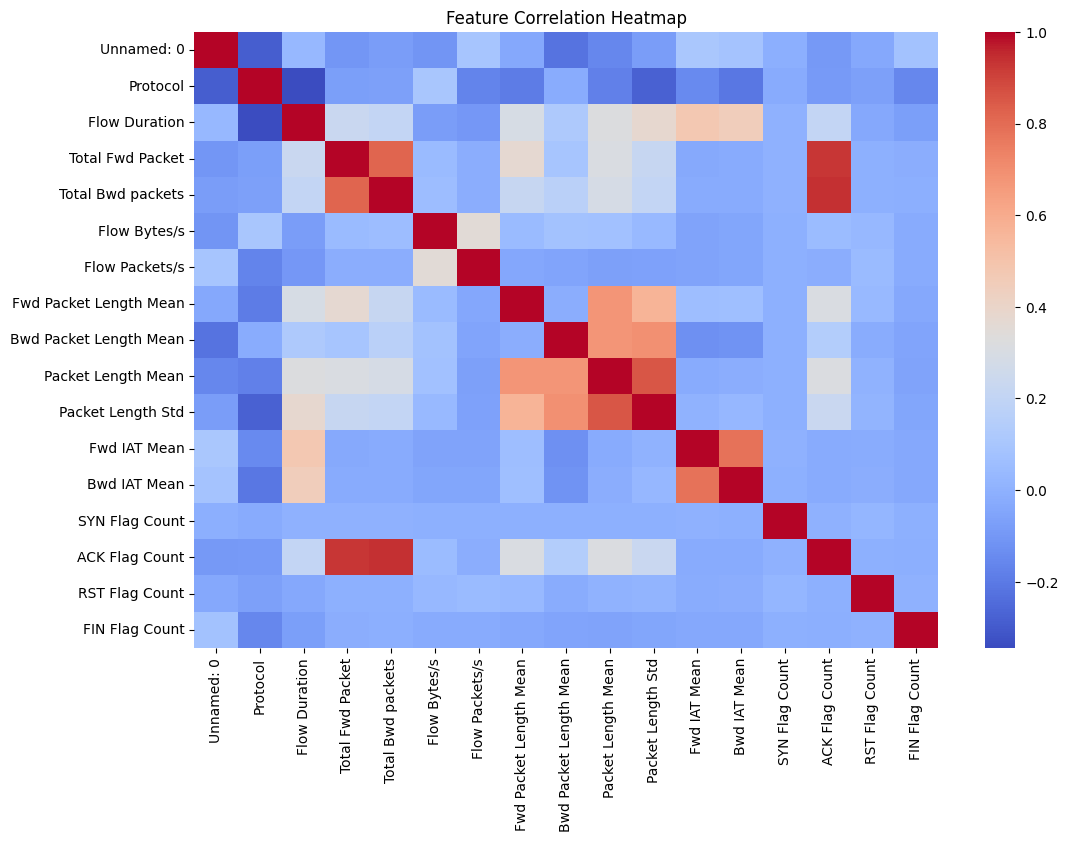

In [55]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()